In [1]:
import pandas as pd
from googletrans import Translator
import numpy as np
import pandas as pd 

import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer 

import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# translating the data into english
# using google translate api
df = pd.read_csv("../data/data.csv")
print(df.head())
test = pd.read_csv("../data/test.csv")
print(test.head())

                                               hindi  complaint category
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...        NaN   kidnap
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...        NaN   murder
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...        NaN   kidnap
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...        NaN   murder
4  मवार को डकैती के मामलों में वांछित दो लोगों को...        NaN    theft
                                               hindi  complaint category
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...        NaN    theft
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...        NaN   murder
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...        NaN   murder
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या ...        NaN   murder
4  अम्बाला के एक गाँव में किसानों की खेत से फसल च...        NaN    theft


In [80]:
def translate(data):
    translator = Translator()
    translations = {}
        #print(column)
       # print(unique)
    for element in data['hindi']:
            # print(element)
            translations[element] = translator.translate(element).text
    data['complaint'] = data['hindi'].map(translations)
    return data

In [92]:
df= translate(df)
test = translate(test)

print(df.head())
print(test.head())


                                               hindi  \
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...   
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...   
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...   
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...   
4  मवार को डकैती के मामलों में वांछित दो लोगों को...   

                                           complaint  category  
0  Two children, a five-year-old boy and a two-ye...         2  
1  In Panchkula, where the bride's neighbor alleg...         3  
2  After kidnapping the seven-year-old child of h...         2  
3  A newlywed hanged himself just six months afte...         3  
4  Two men wanted in robbery cases have been arre...         0  
                                               hindi  \
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...   
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...   
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...   
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या 

In [93]:
df.to_csv("../data/translated data.csv",encoding="utf-8",index=False)
test.to_csv("../data/translated test.csv",encoding="utf-8",index=False)

In [3]:
translated_data= pd.read_csv("../data/translated data.csv")
translated_test = pd.read_csv("../data/translated test.csv")


df['complaint'] = translated_data['complaint']
test['complaint'] = translated_test['complaint']

print(df.head())
print(test.head()) 

                                               hindi  \
0  सोनीपत में दो बच्चों पांच साल के लड़के और दो स...   
1  पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...   
2  सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...   
3  थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...   
4  मवार को डकैती के मामलों में वांछित दो लोगों को...   

                                           complaint category  
0  Two children, a five-year-old boy and a two-ye...   kidnap  
1  In Panchkula, where the bride's neighbor alleg...   murder  
2  After kidnapping the seven-year-old child of h...   kidnap  
3  A newlywed hanged himself just six months afte...   murder  
4  Two men wanted in robbery cases have been arre...    theft  
                                               hindi  \
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...   
1  अम्बाला के एक नगर निगम कर्मचारी को उनके आवास क...   
2  सोनीपत में एक युवक अपनी प्रेमिका से मिलने पहुं...   
3  हिसार में एक दलित व्यक्ति को उसके घर पर हत्या ...   

In [4]:
df["category"].value_counts() 

category
rape        91
kidnap      90
murder      90
theft       90
accident    81
Name: count, dtype: int64

In [5]:
df["category"].value_counts()/df.shape[0] 

category
rape        0.205882
kidnap      0.203620
murder      0.203620
theft       0.203620
accident    0.183258
Name: count, dtype: float64

In [6]:
test["category"].value_counts()

category
theft       29
murder      29
accident    19
kidnap      10
rape         9
Name: count, dtype: int64

In [7]:
test["category"].value_counts()/test.shape[0]

category
theft       0.302083
murder      0.302083
accident    0.197917
kidnap      0.104167
rape        0.093750
Name: count, dtype: float64

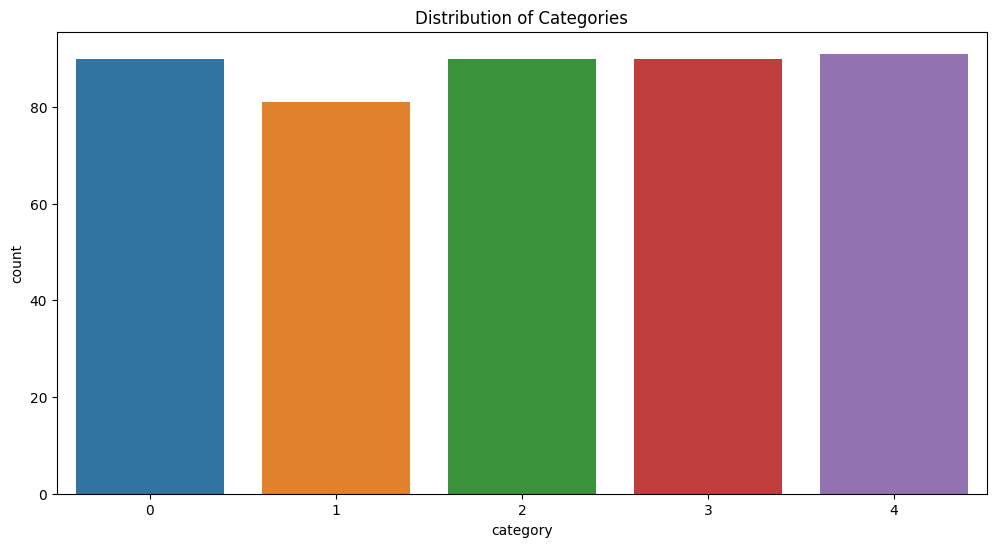

In [148]:
# plot the distribution of the categories
plt.figure(figsize=(12,6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.show()



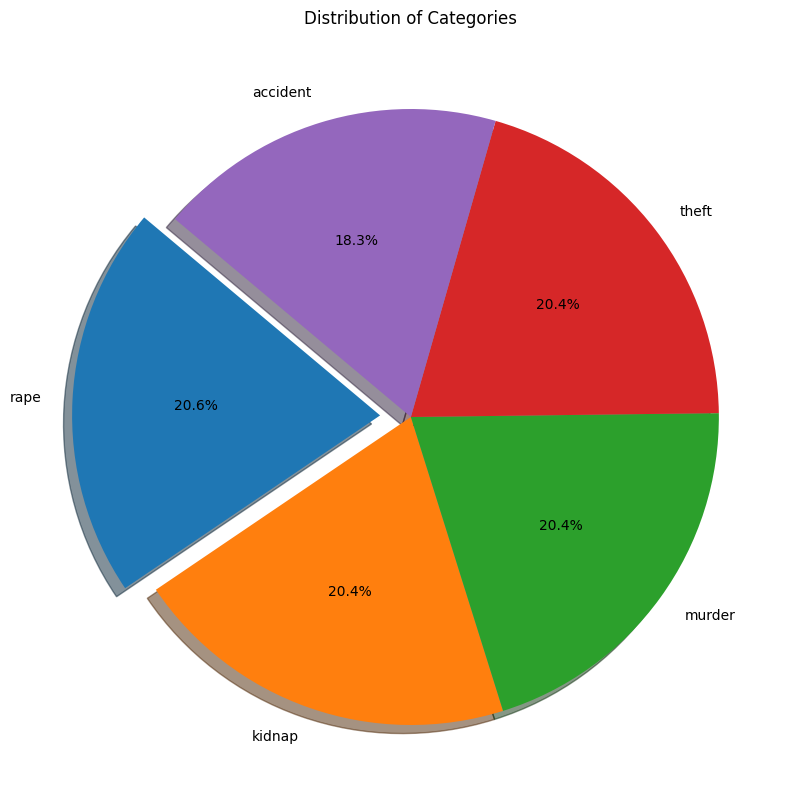

In [158]:
# plot the distribution of the categories as pie chart
labels_idx = df.category.value_counts().index.to_list()
labels_names= ['theft', 'accident', 'kidnap', 'murder', 'rape']
labels= [labels_names[idx] for idx in labels_idx]


sizes = df.category.value_counts()
explode = (0.1, 0, 0, 0,0)  # explode 1st slice
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Categories')
plt.show()


In [8]:
df['category'] = df.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})
test['category'] = test.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})


In [9]:
# data = pd.read_csv('complaint with manual labels.csv')
data= df
display(data.shape) 

(442, 3)

In [10]:
data.head()

,hindi,complaint,category
0,सोनीपत में दो बच्चों पांच साल के लड़के और दो स...,"Two children, a five-year-old boy and a two-ye...",2
1,पंचकुला में जहां शादी की पूर्व संध्या पर दुल्ह...,"In Panchkula, where the bride's neighbor alleg...",3
2,सोनीपत से अपने रिश्तेदार के सात वर्षीय बच्चे क...,After kidnapping the seven-year-old child of h...,2
3,थानेसर मे शादी के महज छह महीने बाद ही एक नवविव...,A newlywed hanged himself just six months afte...,3
4,मवार को डकैती के मामलों में वांछित दो लोगों को...,Two men wanted in robbery cases have been arre...,0


In [11]:
data.columns

Index(['hindi', 'complaint', 'category'], dtype='object')

In [12]:
# df['category'] = df.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})
# test['category'] = test.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})

data = data[["complaint","category"]] # taking text input and output variable as relevance
# data = data[:1000]
data.shape

(442, 2)

In [13]:
data.head()


,complaint,category
0,"Two children, a five-year-old boy and a two-ye...",2
1,"In Panchkula, where the bride's neighbor alleg...",3
2,After kidnapping the seven-year-old child of h...,2
3,A newlywed hanged himself just six months afte...,3
4,Two men wanted in robbery cases have been arre...,0


In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmatizer = WordNetLemmatizer()

def clean(doc):
    text_no_namedentities = []
    document = nlp(doc)
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
    doc = (" ".join(text_no_namedentities))

    doc = doc.lower().strip()
    doc = doc.replace("</br>", " ") 
    doc = doc.replace("-", " ") 
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])    
    doc = "".join([lemmatizer.lemmatize(word) for word in doc])
    return doc

In [15]:
data['complaint'] = data['complaint'].apply(clean)
data.head()

,complaint,category
0,children year old boy year old girl allegedly ...,2
1,bride s neighbor allegedly killed father eve w...,3
2,kidnapping seven year old child relative child...,2
3,newlywed hanged just months marriage suicide g...,3
4,men wanted robbery cases arrested allegedly sh...,0


In [16]:
X = data ['complaint']
y = data['category']
print(X.shape, y.shape)

(442,) (442,)


In [17]:
SEED=246
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(397,) (397,)
(45,) (45,)


In [18]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(X_train)
docs_tf = tfidf_vectorizer_vectors.toarray()

In [19]:
cv= CountVectorizer()
cv_vectorizer = cv.fit_transform(X_train)
docs_cv = cv_vectorizer.toarray()

In [17]:
import joblib
import pickle
import gzip

# option #1
joblib.dump(tfidf_vectorizer, 'vectorizer.pkl', compress=True)

# option #2
# with gzip.open('vectorizer.pkl', 'wb') as f:
#     pickle.dump(tvec, f)

['vectorizer.pkl']

In [18]:
# X_train= docs


In [20]:
tfidf_vectorizer_vectors_test = tfidf_vectorizer.transform(X_test)
docs_test_tf = tfidf_vectorizer_vectors_test.toarray()


In [21]:
cv_vectorizer_test = cv.transform(X_test)
docs_test_cv = cv_vectorizer_test.toarray()

In [20]:
# X_test= docs_test

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


models = [LinearSVC(), MultinomialNB(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), LogisticRegression(), SGDClassifier()]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, docs_tf, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
AdaBoostClassifier,0.385380,0.057422
DecisionTreeClassifier,0.735570,0.070134
GaussianNB,0.702848,0.046989
GradientBoostingClassifier,0.838797,0.032583
KNeighborsClassifier,0.743228,0.037045
LinearSVC,0.831266,0.037239
LogisticRegression,0.851361,0.044027
MultinomialNB,0.808418,0.050559
RandomForestClassifier,0.831171,0.019792


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression


models = [LinearSVC(), MultinomialNB(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), LogisticRegression(), SGDClassifier()]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, docs_cv, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()
acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
AdaBoostClassifier,0.510886,0.108461
DecisionTreeClassifier,0.745443,0.072341
GaussianNB,0.733070,0.063645
GradientBoostingClassifier,0.823544,0.058276
KNeighborsClassifier,0.551646,0.081034
LinearSVC,0.818671,0.016495
LogisticRegression,0.828671,0.024856
MultinomialNB,0.826108,0.043406
RandomForestClassifier,0.846266,0.029199


Gaussian Nb with tf-idf, count vectorizer

In [27]:
gnb = GaussianNB() 
%time gnb.fit(docs_tf, y_train)

y_pred_train = gnb.predict(docs_tf)
y_pred_test = gnb.predict(docs_test_tf)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 15.6 ms
Wall time: 25.7 ms

Training Accuracy score: 0.9949622166246851
Testing Accuracy score: 0.7111111111111111


In [28]:
#testing on unseen data
# test = pd.read_csv('testdata.csv')
# test['category'] = test.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})
test['complaint'] = test['complaint'].apply(clean)
tdocs = list(test['complaint'])
tfidf_vectorizer_vectors = tfidf_vectorizer.transform(tdocs)
tdocs = tfidf_vectorizer_vectors.toarray()
testX_tf = np.array(tdocs )
testy = test['category']
print(testX_tf.shape, testy.shape)

(96, 1905) (96,)


In [29]:
#print unique values of textX[0] 
np.unique(testX_tf[0])

array([0.        , 0.42183558, 0.43594482, 0.49697994, 0.62049802])

In [30]:
test_pred = gnb.predict(testX_tf)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))



Testing Accuracy score: 0.625


In [31]:
print(classification_report(y_test, y_pred_test, target_names=['rape', 'murder', 'kidnap', 'accident', 'theft']))

              precision    recall  f1-score   support

        rape       0.70      0.78      0.74         9
      murder       0.88      0.88      0.88         8
      kidnap       0.54      0.78      0.64         9
    accident       0.57      0.44      0.50         9
       theft       1.00      0.70      0.82        10

    accuracy                           0.71        45
   macro avg       0.74      0.72      0.71        45
weighted avg       0.74      0.71      0.71        45



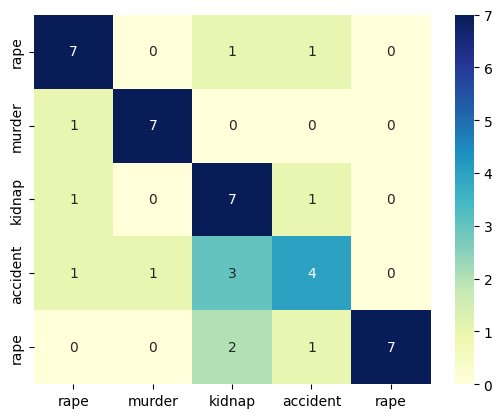

In [32]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['rape', 'murder', 'kidnap', 'accident', 'rape'], 
                        index=['rape', 'murder','kidnap', 'accident', 'rape'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [33]:
print(classification_report(testy, test_pred, target_names=['rape', 'murder','kidnap', 'accident', 'theft']))
print(accuracy_score(testy, test_pred))

              precision    recall  f1-score   support

        rape       0.71      0.83      0.76        29
      murder       0.85      0.89      0.87        19
      kidnap       0.36      0.50      0.42        10
    accident       0.73      0.28      0.40        29
       theft       0.35      0.67      0.46         9

    accuracy                           0.62        96
   macro avg       0.60      0.63      0.58        96
weighted avg       0.67      0.62      0.61        96

0.625


with count vectorizer

In [34]:
gnb = GaussianNB() 
%time gnb.fit(docs_cv, y_train)

y_pred_train = gnb.predict(docs_cv)
y_pred_test = gnb.predict(docs_test_cv)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 25 ms

Training Accuracy score: 0.9949622166246851
Testing Accuracy score: 0.8222222222222222


In [35]:
#testing on unseen data
# test = pd.read_csv('testdata.csv')
# test['category'] = test.category.map({'rape': 4, 'murder': 3, 'kidnap': 2, 'accident':1, 'theft':0})
test['complaint'] = test['complaint'].apply(clean)
tdocs = list(test['complaint'])
cv_vectorizer= cv.transform(tdocs)
tdocs = cv_vectorizer.toarray()
testX_cv = np.array(tdocs )
testy = test['category']
print(testX_cv.shape, testy.shape)

(96, 1905) (96,)


In [36]:
test_pred = gnb.predict(testX_cv)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))



Testing Accuracy score: 0.6041666666666666


MULTINOMIAL NB with tf-idf and count vectorizer

In [38]:
mnb = MultinomialNB() 
%time mnb.fit(docs_tf, y_train)

y_pred_train = mnb.predict(docs_tf)
y_pred_test = mnb.predict(docs_test_tf)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 4.48 ms

Training Accuracy score: 0.9748110831234257
Testing Accuracy score: 0.9111111111111111


In [39]:
test_pred = mnb.predict(testX_tf)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.7083333333333334


In [40]:
print(classification_report(testy, test_pred, target_names=['rape', 'murder', 'kidnap','accident', 'theft']))
print(accuracy_score(testy, test_pred))

              precision    recall  f1-score   support

        rape       0.83      0.69      0.75        29
      murder       0.75      0.95      0.84        19
      kidnap       0.45      0.50      0.48        10
    accident       0.89      0.59      0.71        29
       theft       0.44      0.89      0.59         9

    accuracy                           0.71        96
   macro avg       0.68      0.72      0.67        96
weighted avg       0.76      0.71      0.71        96

0.7083333333333334


with count vectorizer

In [41]:
mnb = MultinomialNB() 
%time mnb.fit(docs_cv, y_train)

y_pred_train = mnb.predict(docs_cv)
y_pred_test = mnb.predict(docs_test_cv)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 19 ms

Training Accuracy score: 0.9773299748110831
Testing Accuracy score: 0.9111111111111111


In [42]:
test_pred = mnb.predict(testX_cv)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.6979166666666666


LOGISITIC REGRESSION WITH tf-idf and count vectorizer

In [44]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(docs_tf, y_train)

y_pred_train = lr.predict(docs_tf)
y_pred_test = lr.predict(docs_test_tf)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 62.5 ms
Wall time: 200 ms

Training Accuracy score: 0.9874055415617129
Testing Accuracy score: 0.9333333333333333


In [45]:
test_pred = lr.predict(testX_tf)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8229166666666666


with count vectorizer

In [46]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(docs_cv, y_train)

y_pred_train = lr.predict(docs_cv)
y_pred_test = lr.predict(docs_test_cv)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 109 ms
Wall time: 188 ms

Training Accuracy score: 0.9949622166246851
Testing Accuracy score: 0.9111111111111111


In [47]:
test_pred = lr.predict(testX_cv)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.78125


SVM WITH tf-idf and count vectorizer

In [49]:
svc =  LinearSVC(class_weight='balanced') 
%time svc.fit(docs_tf, y_train)

y_pred_train = svc.predict(docs_tf)
y_pred_test = svc.predict(docs_test_tf)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 0 ns
Wall time: 10 ms

Training Accuracy score: 0.9949622166246851
Testing Accuracy score: 0.8888888888888888


In [52]:
test_pred = svc.predict(testX_tf)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.7916666666666666


In [53]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_svc= CalibratedClassifierCV(base_estimator=svc, cv=5)


In [54]:
calibrated_svc.fit(docs_tf, y_train)
predicted= calibrated_svc.predict(docs_test_tf)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.8888888888888888


In [55]:
predicted= calibrated_svc.predict(testX_tf)
print("Accuracy:",metrics.accuracy_score(testy, predicted))

Accuracy: 0.8020833333333334


In [56]:
calibrated_svc.predict_proba(testX_tf)*100

array([[56.27563915, 18.01059991,  8.82125704, 13.42314828,  3.46935562],
       [18.97711045,  2.17340606,  8.51158441, 69.23541565,  1.10248343],
       [ 1.16595597,  0.51894869,  4.91810626, 87.29608502,  6.10090407],
       [ 1.40138661,  1.43226288,  4.07842644, 90.30857831,  2.77934575],
       [43.83609696,  6.92394679,  5.15777438,  6.60262071, 37.47956116],
       [57.33601636,  1.47675422,  9.04460449,  6.21740446, 25.92522046],
       [ 1.01955157,  1.31596597, 27.24189008, 14.70221319, 55.72037918],
       [15.18915265,  3.24459007, 18.00845108, 58.30175116,  5.25605505],
       [ 1.16443292,  2.47117588, 28.31238631, 52.91823859, 15.13376629],
       [ 0.85963049, 18.13651276, 18.65487443, 60.95490662,  1.3940757 ],
       [20.21651786,  0.99243039, 52.13636605,  8.97836094, 17.67632475],
       [33.84916014, 16.41278041, 43.36736946,  3.12925703,  3.24143295],
       [ 5.20446795,  2.69897434, 10.38571641, 71.87564519,  9.83519611],
       [ 4.62452538, 80.33935445,  9.1

In [57]:
from sklearn import svm

rbf= svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(docs_tf, y_train)
poly= svm.SVC(kernel='poly', degree=3, C=1).fit(docs_tf, y_train)

In [58]:
rbf_val= rbf.predict(docs_test_tf)
poly_val= poly.predict(docs_test_tf)

print("RBF Accuracy: ", accuracy_score(y_test, rbf_val))
print("Poly Accuracy: ", accuracy_score(y_test, poly_val))

RBF Accuracy:  0.7777777777777778
Poly Accuracy:  0.8


In [59]:
rbf_test_pred = rbf.predict(testX_tf)
poly_test_pred = poly.predict(testX_tf)
print("\nRBF Testing Accuracy score:",accuracy_score(testy, rbf_test_pred))
print("\nPolynomial Testing Accuracy score:",accuracy_score(testy, poly_test_pred))


RBF Testing Accuracy score: 0.6354166666666666

Polynomial Testing Accuracy score: 0.6458333333333334


with count vectorizer

In [60]:
svc =  LinearSVC(class_weight='balanced') 
%time svc.fit(docs_cv, y_train)

y_pred_train = svc.predict(docs_cv)
y_pred_test = svc.predict(docs_test_cv)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 15.6 ms
Wall time: 20 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.9111111111111111


In [61]:
test_pred = svc.predict(testX_cv)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.7604166666666666


In [62]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_svc= CalibratedClassifierCV(base_estimator=svc, cv=5)
calibrated_svc.fit(docs_cv, y_train)
predicted= calibrated_svc.predict(docs_test_cv)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9111111111111111


In [63]:
predicted= calibrated_svc.predict(testX_cv)
print("Accuracy:",metrics.accuracy_score(testy, predicted))

Accuracy: 0.7916666666666666


In [64]:
from sklearn import svm

rbf= svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(docs_cv, y_train)
poly= svm.SVC(kernel='poly', degree=3, C=1).fit(docs_cv, y_train)

In [65]:
rbf_val= rbf.predict(docs_test_cv)
poly_val= poly.predict(docs_test_cv)

print("RBF Accuracy: ", accuracy_score(y_test, rbf_val))
print("Poly Accuracy: ", accuracy_score(y_test, poly_val))

RBF Accuracy:  0.24444444444444444
Poly Accuracy:  0.4888888888888889


In [66]:
rbf_test_pred = rbf.predict(testX_cv)
poly_test_pred = poly.predict(testX_cv)
print("\nRBF Testing Accuracy score:",accuracy_score(testy, rbf_test_pred))
print("\nPolynomial Testing Accuracy score:",accuracy_score(testy, poly_test_pred))


RBF Testing Accuracy score: 0.2604166666666667

Polynomial Testing Accuracy score: 0.3125


DECISION TREE CLASSIFIER WITH TF-IDF AND COUNT VECTORIZER

In [67]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(docs_tf, y_train)

y_pred_train = dt.predict(docs_tf)
y_pred_test = dt.predict(docs_test_tf)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 31.2 ms
Wall time: 59.6 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.8888888888888888


In [68]:
test_pred = dt.predict(testX_tf)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.6458333333333334


with count vectorizer

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(docs_cv, y_train)

y_pred_train = dt.predict(docs_cv)
y_pred_test = dt.predict(docs_test_cv)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 31.2 ms
Wall time: 51.5 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.8666666666666667


In [70]:
test_pred = dt.predict(testX_cv)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.7083333333333334


RANDOM FOREST WITH TF-IDF AND COUNT VECTORIZER

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=SEED)
%time rf.fit(docs_tf, y_train)

y_pred_train = rf.predict(docs_tf)
y_pred_test = rf.predict(docs_test_tf)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 219 ms
Wall time: 427 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.8888888888888888


In [72]:
test_pred = rf.predict(testX_tf)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.7916666666666666


WITH COUNT VECTORIZER

In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=SEED)
%time rf.fit(docs_cv, y_train)

y_pred_train = rf.predict(docs_cv)
y_pred_test = rf.predict(docs_test_cv)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: total: 234 ms
Wall time: 402 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.9111111111111111


In [74]:
test_pred = rf.predict(testX_cv)
print("\nTesting Accuracy score:",accuracy_score(testy, test_pred))


Testing Accuracy score: 0.8229166666666666


VOTING CLASSIFIER (LR+RF+SVM+NB) WITH TF-IDF AND COUNT VECTORIZER

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import sklearn.model_selection as model_selection
import xgboost as xgb
kfold= model_selection.KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = LinearSVC()
estimators.append(('svm', model2))
model3 = MultinomialNB()
estimators.append(('nb', model3))
model4 = RandomForestClassifier()
estimators.append(('rf', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, docs_tf, y_train, cv=kfold)
print(results.mean())


0.8389102564102563


In [116]:
ensemble.fit(docs_tf, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('svm', LinearSVC()), ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier())])

In [117]:

# Model Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = ensemble.predict(docs_test_tf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9333
Precision: 0.9405
Recall: 0.9333
F1-score: 0.9331


In [118]:
test_pred = ensemble.predict(testX_tf)
accuracy= accuracy_score(testy, test_pred)
precision= precision_score(testy, test_pred, average='weighted')
recall= recall_score(testy, test_pred, average='weighted')
f1= f1_score(testy, test_pred, average='weighted')
print("Testing Accuracy score: ",accuracy)
print("Testing Precision score: ",precision)
print("Testing Recall score: ",recall)
print("Testing F1 score: ",f1)


Testing Accuracy score:  0.8020833333333334
Testing Precision score:  0.8141312734836285
Testing Recall score:  0.8020833333333334
Testing F1 score:  0.8024974730458222


WITH COUNT VECTORIZER

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import sklearn.model_selection as model_selection
import xgboost as xgb
kfold= model_selection.KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = LinearSVC()
estimators.append(('svm', model2))
model3 = MultinomialNB()
estimators.append(('nb', model3))
model4 = RandomForestClassifier()
estimators.append(('rf', model4))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, docs_cv, y_train, cv=kfold)
print(results.mean())


0.8385897435897436


In [120]:
ensemble.fit(docs_cv, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('svm', LinearSVC()), ('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier())])

In [121]:

# Model Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = ensemble.predict(docs_test_cv)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9333
Precision: 0.9405
Recall: 0.9333
F1-score: 0.9331


In [122]:
test_pred = ensemble.predict(testX_cv)
accuracy= accuracy_score(testy, test_pred)
precision= precision_score(testy, test_pred, average='weighted')
recall= recall_score(testy, test_pred, average='weighted')
f1= f1_score(testy, test_pred, average='weighted')
print("Testing Accuracy score: ",accuracy)
print("Testing Precision score: ",precision)
print("Testing Recall score: ",recall)
print("Testing F1 score: ",f1)


Testing Accuracy score:  0.78125
Testing Precision score:  0.7862522893772893
Testing Recall score:  0.78125
Testing F1 score:  0.7819847550110709


In [131]:
# write code to create a table for the accuracies of all models with tf-idf vectorizer and count vectorizer and compare them 
# rows will be the models and columns will be tf-idf and count vectorizer
# use the table to write the report

def find_accuracy(model,X_train, Y_train, X_test, testy):
    model.fit(X_train, Y_train)
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(testy, y_pred_test)
    return test_acc

def tabulate(models, testX_tf, testX_cv):
    table= []
    for model_name in models.keys():
        model = models[model_name]
        print(model_name)
        table.append([model_name, find_accuracy(model,docs_tf, y_train, testX_tf, testy), find_accuracy(model, docs_cv, y_train, testX_cv, testy)])
    return pd.DataFrame(table, columns=['Model', 'TF-IDF', 'Bag of Words'])


models={
    "Gaussian Naive Bayes": gnb,
    "Multinomial Naive Bayes": mnb,
    "Logistic Regression": lr,
    # "Linear SVC": svc,
    "Support Vector Machine": calibrated_svc,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Ensemble (Logistic + NB + RF + SVM)": ensemble,
}

table = tabulate(models, testX_tf, testX_cv)
table

Gaussian Naive Bayes
Multinomial Naive Bayes
Logistic Regression
Support Vector Machine
Decision Tree
Random Forest
Ensemble (Logistic + NB + RF + SVM)


,Model,TF-IDF,Bag of Words
0,Gaussian Naive Bayes,0.625000,0.604167
1,Multinomial Naive Bayes,0.708333,0.697917
2,Logistic Regression,0.822917,0.781250
3,Support Vector Machine,0.802083,0.791667
4,Decision Tree,0.645833,0.708333
5,Random Forest,0.791667,0.822917
6,Ensemble (Logistic + NB + RF + SVM),0.802083,0.791667


In [143]:
table=[]
for model_name in models.keys():
        model = models[model_name]
        # print(model_name)
        table.append([model_name, find_accuracy(model,docs_tf, y_train, docs_test_tf, y_test), find_accuracy(model, docs_tf, y_train, testX_tf, testy)])
comparison= pd.DataFrame(table, columns=['Model', 'Validation Accuracy', 'Test Accuracy'])
print("Models accuracy on validation and test data with TF-IDF vectorizer")
comparison

Models accuracy on validation and test data with TF-IDF vectorizer


,Model,Validation Accuracy,Test Accuracy
0,Gaussian Naive Bayes,0.711111,0.625000
1,Multinomial Naive Bayes,0.911111,0.708333
2,Logistic Regression,0.933333,0.822917
3,Support Vector Machine,0.888889,0.802083
4,Decision Tree,0.888889,0.645833
5,Random Forest,0.888889,0.791667
6,Ensemble (Logistic + NB + RF + SVM),0.933333,0.812500


In [144]:
table=[]
for model_name in models.keys():
        model = models[model_name]
        # print(model_name)
        table.append([model_name, find_accuracy(model,docs_cv, y_train, docs_test_cv, y_test), find_accuracy(model, docs_cv, y_train, testX_cv, testy)])
comparison= pd.DataFrame(table, columns=['Model', 'Validation Accuracy', 'Test Accuracy'])
print("Models accuracy on validation and test data with Bag of Words vectorizer")
comparison

Models accuracy on validation and test data with Bag of Words vectorizer


,Model,Validation Accuracy,Test Accuracy
0,Gaussian Naive Bayes,0.822222,0.604167
1,Multinomial Naive Bayes,0.911111,0.697917
2,Logistic Regression,0.911111,0.781250
3,Support Vector Machine,0.911111,0.791667
4,Decision Tree,0.866667,0.708333
5,Random Forest,0.911111,0.822917
6,Ensemble (Logistic + NB + RF + SVM),0.933333,0.802083


In [159]:
# write code to compare the running time, precision, recall, f1-score of all models with tf-idf vectorizer and count vectorizer
# use the table to write the report

def find_params(model,X_train, Y_train, X_test, testy):
    model.fit(X_train, Y_train)
    start= time()
    y_pred_test = model.predict(X_test)
    test_precision = precision_score(testy, y_pred_test, average='weighted')
    test_recall = recall_score(testy, y_pred_test, average='weighted')
    test_f1 = f1_score(testy, y_pred_test, average='weighted')
    test_runtime= time()-start
    return test_runtime, test_precision, test_recall, test_f1

def tabulate(models):
    table= []
    for model_name in models.keys():
        model = models[model_name][0]
        docs_test = models[model_name][1]
        testx= models[model_name][2]
        print(model_name)
        runtime, precision, recall, f1= find_params(model,docs_test, y_train, testx, testy)
        table.append([model_name, runtime, precision, recall, f1])
    return pd.DataFrame(table, columns=['Model', 'Runtime', 'Precision', 'Recall', 'F1-score'])


models={
    "Logistic Regression": [lr, docs_tf, testX_tf],
    # "Linear SVC": svc,
    "Support Vector Machine": [calibrated_svc, docs_tf, testX_tf],
    "Random Forest": [rf, docs_cv, testX_cv],
    "Ensemble (Logistic + NB + RF + SVM)": [ensemble , docs_tf, testX_tf],
}

table = tabulate(models)
table


Logistic Regression
Support Vector Machine
Random Forest
Ensemble (Logistic + NB + RF + SVM)


,Model,Runtime,Precision,Recall,F1-score
0,Logistic Regression,0.008132,0.822635,0.822917,0.821043
1,Support Vector Machine,0.010740,0.813417,0.802083,0.802568
2,Random Forest,0.010922,0.838609,0.822917,0.820260
3,Ensemble (Logistic + NB + RF + SVM),0.010850,0.845043,0.843750,0.842876


-- **BEST MODEL**

In [32]:
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)

In [33]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(testX_tf)

# check results
print(classification_report(testy, y_predict)) 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.82      0.95      0.88        19
           2       0.78      0.70      0.74        10
           3       0.88      0.76      0.81        29
           4       0.89      0.89      0.89         9

    accuracy                           0.84        96
   macro avg       0.84      0.84      0.84        96
weighted avg       0.85      0.84      0.84        96



In [34]:
complaint= {'hindi': ['करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने दिनभर की कमाई चुरा ली।', 'जय प्रकाश ने पड़ोस में रहने वाली नाबालिग को बहला फुसला कर दुष्कर्म किया। यहां तक कि पीड़िता को डरा धमका कर कई महीनों तक जबरन संबंध बनाता रहा। मंगलवार को पीड़िता को पेट में दर्द होने पर जब डॉक्टर के पास ले जाया गया, तो पता चला कि वह चार माह से गर्भवती है। परिवार के लोगों ने उससे पूछताछ की तो जानकारी मिली कि आरोपी ने दुष्कर्म किया था। वह डर से बता नहीं पा रही थी।']}
complaint['complaint'] = ''
complaint = pd.DataFrame(complaint)
print(complaint)


                                               hindi complaint
0  करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...          
1  जय प्रकाश ने पड़ोस में रहने वाली नाबालिग को बह...          


In [35]:
from googletrans import Translator

complaint['complaint'] = complaint['hindi'].apply(lambda x: Translator().translate(x, dest='en').text)


In [36]:
complaint

,hindi,complaint
0,करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...,Unknown persons stole the day's earnings from ...
1,जय प्रकाश ने पड़ोस में रहने वाली नाबालिग को बह...,Jai Prakash raped a minor living in the neighb...


In [37]:

complaint['complaint']= complaint['complaint'].apply(clean)
docs = list(complaint['complaint'])
tfidf_vectorizer_vectors = tfidf_vectorizer.transform(docs)
docs = tfidf_vectorizer_vectors.toarray()
print(docs)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
complaint['complaint']

0          unknown persons stole s earnings restaurant
1    jai prakash raped minor living neighborhood se...
Name: complaint, dtype: object

In [39]:
complaint['category'] = model.predict(docs)

In [40]:
complaint

,hindi,complaint,category
0,करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...,unknown persons stole s earnings restaurant,0
1,जय प्रकाश ने पड़ोस में रहने वाली नाबालिग को बह...,jai prakash raped minor living neighborhood se...,4


In [62]:
#print unique values of textX[0] 
print(np.unique(testX_tf[1]))
np.unique(docs[1])

[0.         0.55417703 0.83239883]


array([0.])

In [64]:
print(test['complaint'][0])
print(complaint)


,complaint
0,करनाल के एक रेस्टोरेंट में अनजान व्यक्तियों ने...
1,जय प्रकाश ने पड़ोस में रहने वाली नाबालिग को बह...


In [39]:
prediction= rf.predict(complaint)
print(prediction)


[3 3]
